#  Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


# Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.



#  Output: Number of predicted wins (W)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# linear regression promblem 

In [3]:
df.sample(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


#  random no of data in the dataset

In [4]:
df.shape

(30, 17)

#  There is 30 columns and 17 rows present in the dataset

In [5]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#  There is no null value present in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


#  there is all numerical column in the dataset

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#   
As per the statistics information there is 30 count of each columns

it means there is no null value present in the dataset

the all column mean value and 50 percentile is veary close to each others so there is no skewness in the dataset

#  EDA

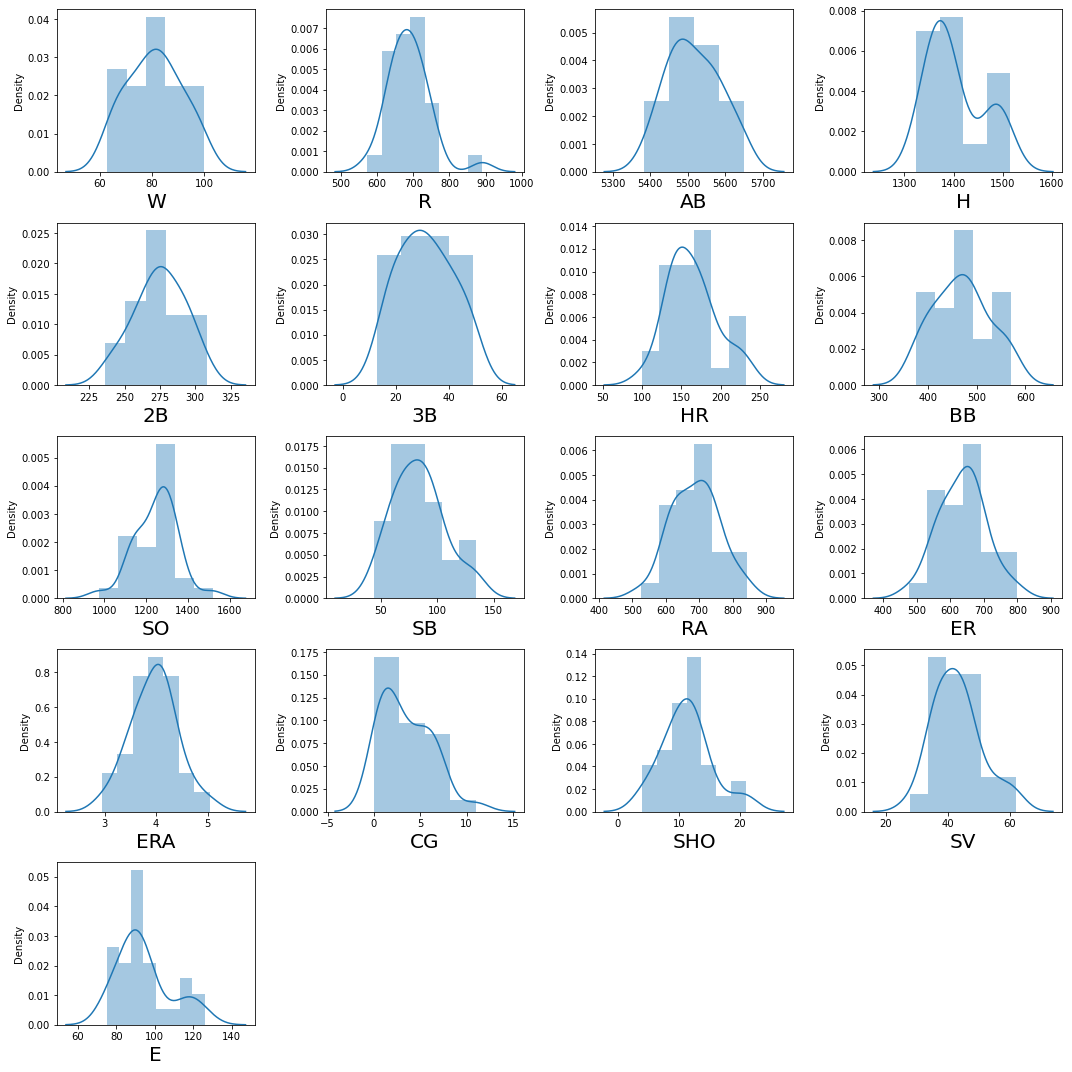

In [8]:
plt.figure (figsize=(15,15))
plotnumber =1

for column in df.columns:
    if plotnumber <= 17:
        ax= plt.subplot (5,4,plotnumber)
        sns.distplot (df[column] )
        plt.xlabel (column,fontsize=20)
      
        
    plotnumber += 1
    
plt.tight_layout()

#  All columns is closed to look like a normal distrubution

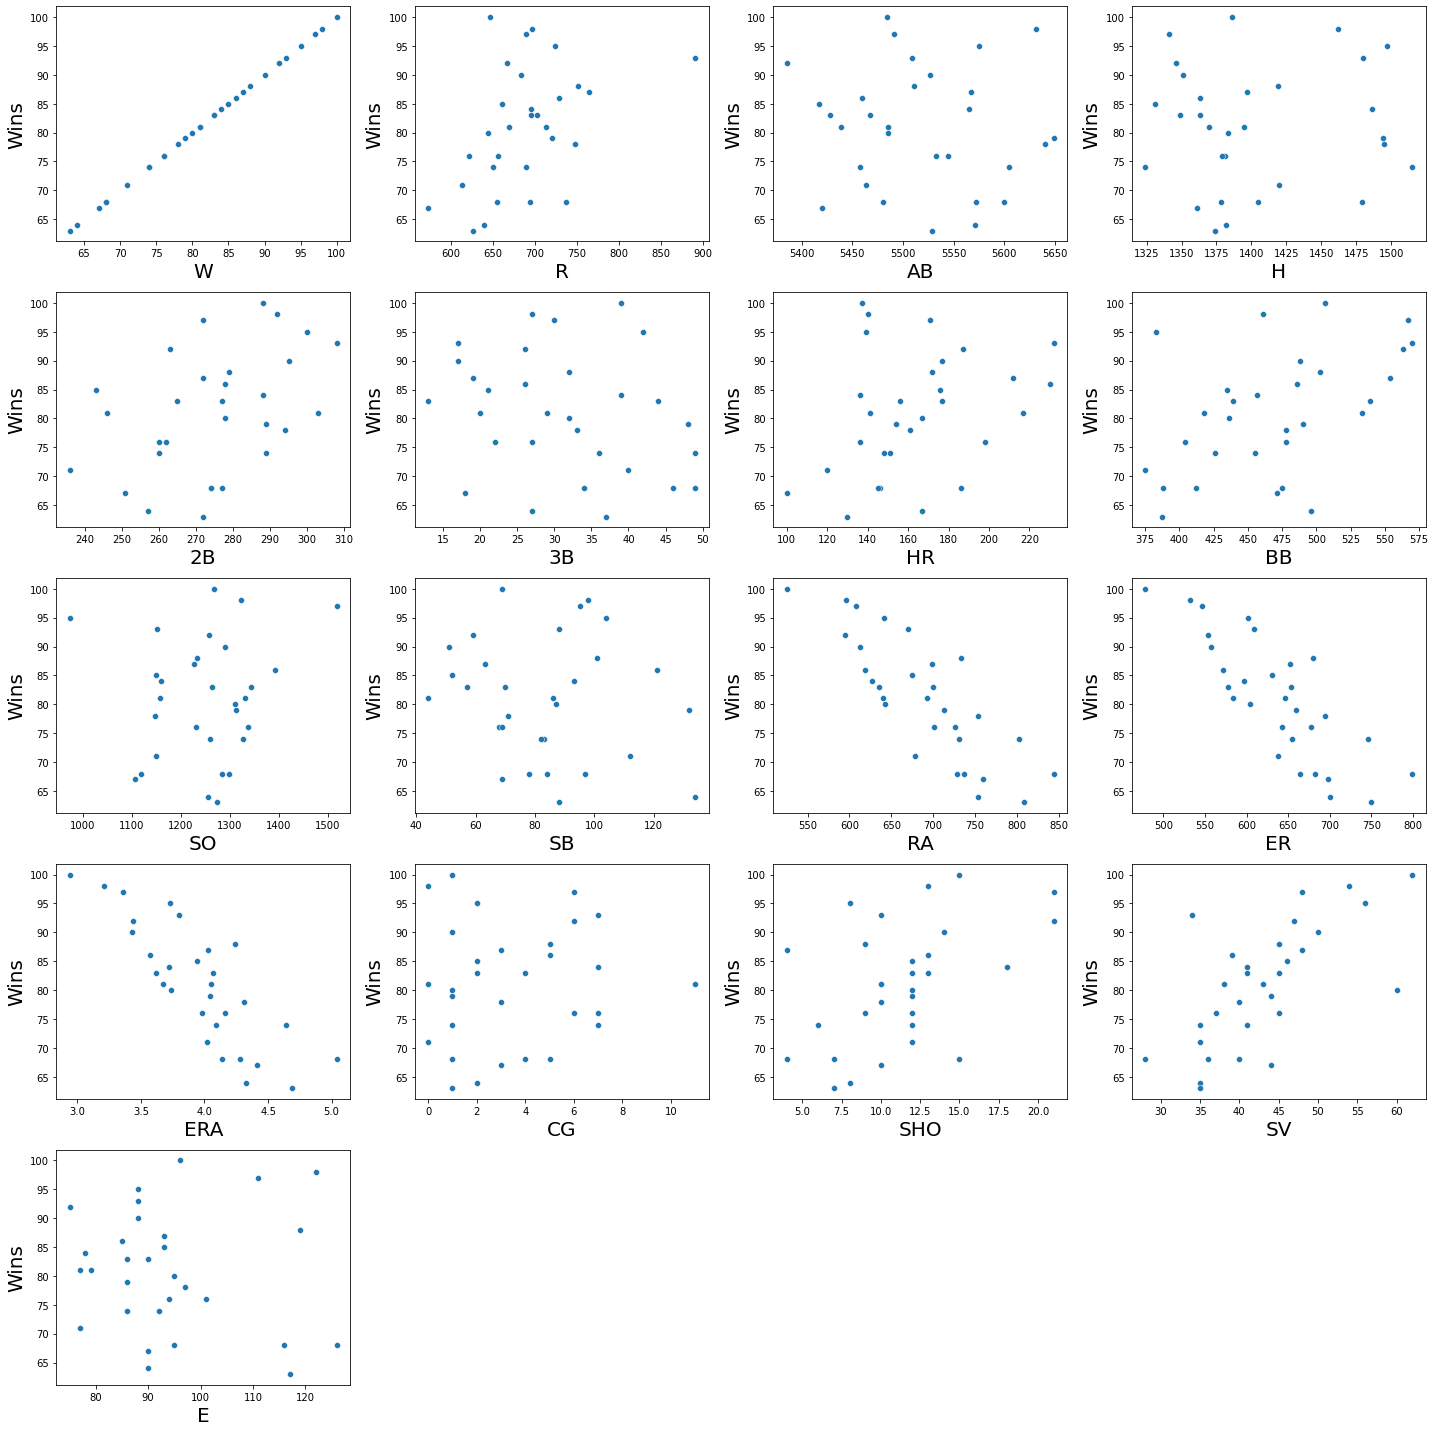

In [9]:
plt.figure (figsize=(20,20))
plotnumber =1

for column in df.columns:
    if plotnumber <= 17:
        plt.subplot (5,4,plotnumber)
        ax= sns.scatterplot (x = df[column] ,y =df['W'],data=df )
        plt.xlabel (column,fontsize=20)
        plt.ylabel ('Wins',fontsize=20)
      
        
    plotnumber += 1
    
plt.tight_layout()

#  the data is messy but it has a relation with target varibales

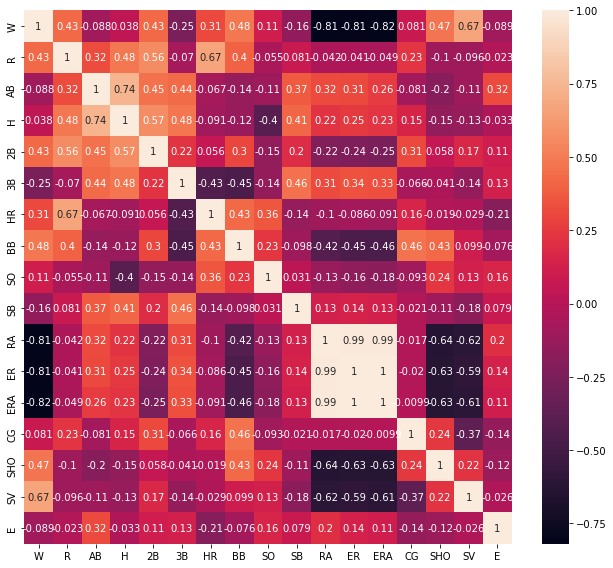

In [10]:
plt.figure(figsize =(9,8))
sns.heatmap(df.corr(), annot =True)
plt.tight_layout()

#  RA column has Multicollinearity  promble with ER and ERA but we need more prouf to take any actions

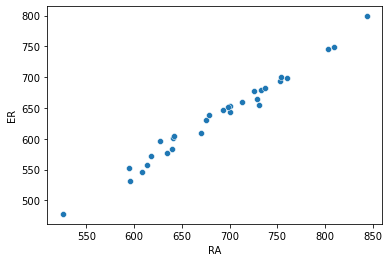

In [11]:
sns.scatterplot(data=df, x ='RA' ,y ='ER')

plt.show()

#  RA column and ER column has a strong relaion with each other

<AxesSubplot:xlabel='RA', ylabel='ERA'>

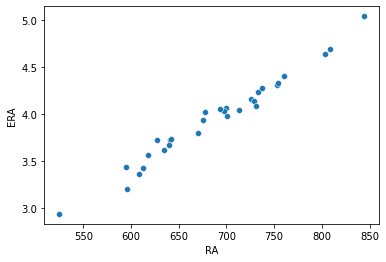

In [12]:
sns.scatterplot(data=df, x ='RA' ,y ='ERA')

# RA column and ERA column has a strong relaion with each other

In [13]:
df.drop(columns=['ER','ERA'],inplace=True)

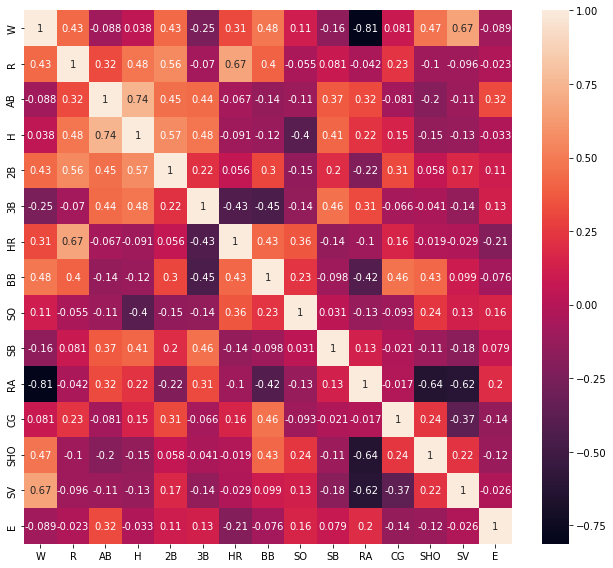

In [14]:
plt.figure(figsize =(9,8))
sns.heatmap(df.corr(), annot =True)
plt.tight_layout()

#  there is no corelation with other columns

In [15]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#  
skewness value between -0.5 and +0.5 indicates a relatively symmetric distribution 

there are outliers present in the data we have to remove it

In [16]:
s

NameError: name 's' is not defined

In [17]:
x= df.drop(columns='W')
y = df['W']

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(30, 14)

In [19]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [20]:
x=x[(z<3).all(axis=1)]
print(x.shape)

(29, 14)


In [22]:
y =y[(z<3).all(axis=1)]
print(y.shape)

(29,)


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,6.755059,R
1,4.961772,AB
2,8.164151,H
3,3.391156,2B
4,3.171542,3B
5,6.350851,HR
6,3.148538,BB
7,2.135385,SO
8,1.881279,SB
9,5.088134,RA


In [25]:
x.drop(['R', 'H', 'HR'], axis=1, inplace=True)

#  drop this greater than vif value

In [26]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [27]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.903737762824293 at random_state 198


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [30]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.903737762824293
R2_score on training data:  72.8889219910327
MEAN ABSOLUTE ERROR : 2.813195859990254
MEAN SQUARED ERROR : 14.952734174626496
ROOT MEAN SQUARED ERROR : 3.866876539873816


In [31]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.586430390248582
R2_score on training data:  99.99997713571051
MEAN ABSOLUTE ERROR : 6.2667297370172435
MEAN SQUARED ERROR : 64.2411460480536
ROOT MEAN SQUARED ERROR : 8.015057457564081


In [32]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.6784340486409155
R2_score on training data:  89.36324087501157
MEAN ABSOLUTE ERROR : 5.731111111111111
MEAN SQUARED ERROR : 49.94991111111112
ROOT MEAN SQUARED ERROR : 7.067525105092384


In [33]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.903737762824293
R2_score on training data:  100.0
MEAN ABSOLUTE ERROR : 2.813195859990254
MEAN SQUARED ERROR : 14.952734174626496
ROOT MEAN SQUARED ERROR : 3.866876539873816


In [34]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.42686695278969944
R2_score on training data:  22.058560365308054
MEAN ABSOLUTE ERROR : 8.022222222222222
MEAN SQUARED ERROR : 89.02666666666669
ROOT MEAN SQUARED ERROR : 9.435394356711683


In [35]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.8959051998755434
R2_score on training data:  71.48951202375889
MEAN ABSOLUTE ERROR : 3.07141312070386
MEAN SQUARED ERROR : 16.169392285998935
ROOT MEAN SQUARED ERROR : 4.021118287988919


In [36]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.905733137711029
R2_score on training data:  22.058560365308054
MEAN ABSOLUTE ERROR : 2.7555749332742545
MEAN SQUARED ERROR : 14.642785942220156
ROOT MEAN SQUARED ERROR : 3.8265893354552896


#  CROSS VALIDATION SCORE

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[ 0.21071058 -4.32642569  0.53490087  0.32264115  0.89038718]
-0.4735571801143722
Difference between Accuracy score  and cross validation score is -  1.3772949429386652


In [39]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[ -0.60817621 -10.65087686   0.62107092   0.56340915   0.87780398]
-1.839353804854485
Difference between Accuracy score  and cross validation score is -  2.425784195103067


In [40]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[ 0.16816818 -7.17209868  0.50577976  0.42576492  0.97644723]
-1.01918771963246
Difference between Accuracy score  and cross validation score is -  1.6976217682733754


In [41]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[ -0.86477273 -13.39473684   0.70138018   0.17540984   0.62853774]
-2.5508363643609284
Difference between Accuracy score  and cross validation score is -  2.6023385102836754


In [42]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[-0.36786364 -2.78263158  0.31115015 -0.11895082  0.83903302]
-0.42385257394658904
Difference between Accuracy score  and cross validation score is -  0.8507195267362885


In [43]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[ 0.25093635 -4.15140508  0.58897644  0.38508779  0.8714431 ]
-0.41099227949455786
Difference between Accuracy score  and cross validation score is -  1.3068974793701011


In [44]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[ 0.22356028 -4.32210848  0.53540625  0.32202884  0.8900991 ]
-0.4702028008773319
Difference between Accuracy score  and cross validation score is -  1.375935938588361


#  GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
params = {'fit_intercept': [True, False],
          'normalize': [True, False]}




In [47]:
gdsv = GridSearchCV(LinearRegression(), params, cv=5)
gdsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [48]:
gdsv.best_params_

{'fit_intercept': False, 'normalize': True}

In [49]:
Final_model = LinearRegression(fit_intercept = True, normalize = True )
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= r2_score(y_test, pred)
print(acc*100)

90.37377628242929


In [53]:
residuals = y_test - y_pred

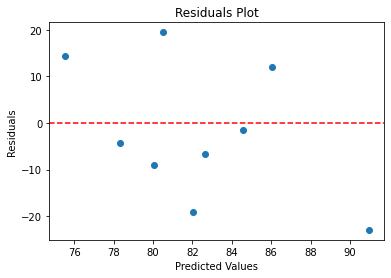

In [55]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

#  This are error in the projects